# Getting Covid data with BeautifulSoup

Let's figure out how to scrape some [data on the coronavirus from Wikipedia](https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory).

## Inspect the first table element

Using Chrome, go to URL:

[https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory](https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory)

and then in Chrome you can go to "View" --> "Developer" --> "View Source"

That shows you the raw HTML and what it corresponds to visually.  The next step is to use a program to extract that HTML.

## Get the raw HTML from the website

In [2]:
! pip install bs4
! pip install requests
! pip install lxml

In [3]:
from bs4 import BeautifulSoup
import requests

CovidURL = "https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory"
response = requests.get(CovidURL)
print(response.text[0:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>COVID-19 pandemic by country and territory - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function(){var cookie=document.cookie.match

## Get specific tag using BeautifulSoup

Now let's treat the text as HTML not just English text.  Then we can ask for a specific tag such as the title:

In [4]:
soup = BeautifulSoup(response.text, "lxml")
title = soup.find('title')
print("TITLE", title)

TITLE <title>COVID-19 pandemic by country and territory - Wikipedia</title>


##  Get all text elements from all HTML tags

We can also ask for all of the text elements not inside HTML tags:

In [4]:
print(soup.text[0:500].replace('\n', ' '))

    COVID-19 pandemic by country and territory - Wikipedia                                     Jump to content         Main menu      Main menu move to sidebar hide    		Navigation 	  Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate     		Contribute 	  HelpLearn to editCommunity portalRecent changesUpload file     Languages  Language links are at the top of the page across from the title.                    Search                Create accountLog in       Personal too


## Find all tables

BeautifulSoup has a mechanism to find all of the tables (HTML `table` text) in an HTML document:

In [5]:
tables = soup.findAll('table')

The first table looks like this on the page:
 
<img src="figures/covid-table-0.png" width="30%">

and we can get the HTML representing each table:

In [6]:
t = str(tables[0])
print(t[0:1000])

<table class="infobox"><tbody><tr><th class="infobox-above" colspan="2" style="background:#FFCCCB">COVID-19 pandemic</th></tr><tr><td class="infobox-image" colspan="2" style="border-bottom:#aaa 1px solid;"><a class="image" href="/wiki/File:COVID-19_Outbreak_World_Map_Total_Deaths_per_Capita.svg"><img alt="COVID-19 Outbreak World Map Total Deaths per Capita.svg" data-file-height="1398" data-file-width="2754" decoding="async" height="168" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/88/COVID-19_Outbreak_World_Map_Total_Deaths_per_Capita.svg/330px-COVID-19_Outbreak_World_Map_Total_Deaths_per_Capita.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/88/COVID-19_Outbreak_World_Map_Total_Deaths_per_Capita.svg/495px-COVID-19_Outbreak_World_Map_Total_Deaths_per_Capita.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/88/COVID-19_Outbreak_World_Map_Total_Deaths_per_Capita.svg/660px-COVID-19_Outbreak_World_Map_Total_Deaths_per_Capita.svg.png 2x" width="330"/>

That is raw HTML representing the table, but we can use a Jupyter notebook trick to display that text as HTML:

In [7]:
from IPython.display import HTML # IPython is the underlying Python interpreter used by this notebook
HTML(t)                          # Render the text in t as HTML

### Death rate table

The death rate per country table is `table[9]` (found by trial-and-error) and we get a nice data frame from it too:

In [8]:
len(tables)

69

In [15]:
for i in range(69):
    print(i, tables[i].find("caption"))

0 None
1 None
2 None
3 None
4 None
5 None
6 None
7 None
8 None
9 None
10 None
11 None
12 <caption><a href="/wiki/COVID-19" title="COVID-19">COVID-19</a> cases, deaths, and rates by <a class="mw-selflink selflink">location</a><sup class="reference" id="cite_ref-Template:COVID-19_datab_27-0"><a href="#cite_note-Template:COVID-19_datab-27">[22]</a></sup>
</caption>
13 <caption>2022 monthly cumulative COVID-19 deaths<sup class="reference" id="cite_ref-WHO-csv_32-0"><a href="#cite_note-WHO-csv-32">[24]</a></sup><sup class="reference" id="cite_ref-WHO-dashboard_33-0"><a href="#cite_note-WHO-dashboard-33">[25]</a></sup><sup class="reference" id="cite_ref-WHO-reports_34-0"><a href="#cite_note-WHO-reports-34">[26]</a></sup>
</caption>
14 <caption>2021 (second-half) monthly cumulative COVID-19 deaths<sup class="reference" id="cite_ref-WHO-csv_32-1"><a href="#cite_note-WHO-csv-32">[24]</a></sup><sup class="reference" id="cite_ref-WHO-dashboard_33-1"><a href="#cite_note-WHO-dashboard-33">[25]</a><

In [68]:
table = tables[12]

In [69]:
#Look at table
#table
tbody = table.find("tbody")

In [70]:
tbody

<tbody><tr class="sticky-row">
<th class="unsortable" style="padding-bottom: 1em;">
</th>
<th scope="col" style="padding-bottom: 1em;">Country
</th>
<th scope="col" style="padding-bottom: 1em;"><abbr title="Deaths per million">Deaths / million</abbr>
</th>
<th scope="col" style="padding-bottom: 1em;">Deaths
</th>
<th scope="col" style="padding-bottom: 1em;">Cases
</th></tr>
<tr class="sorttop static-row-header">
<td data-sort-value="World" style="text-align: center;"><img alt="" data-file-height="20" data-file-width="20" decoding="async" height="16" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/OOjs_UI_icon_globe.svg/16px-OOjs_UI_icon_globe.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/OOjs_UI_icon_globe.svg/24px-OOjs_UI_icon_globe.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/83/OOjs_UI_icon_globe.svg/32px-OOjs_UI_icon_globe.svg.png 2x" width="16"/>
</td>
<th scope="row"><a href="/wiki/COVID-19_pandemic" title="COVID-19 pandemic">Worl

### Getting column names
Note that column names have attribute scope="col"

In [74]:
header = tbody.find_all("th", {"scope": "col"})
header

[<th scope="col" style="padding-bottom: 1em;">Country
 </th>,
 <th scope="col" style="padding-bottom: 1em;"><abbr title="Deaths per million">Deaths / million</abbr>
 </th>,
 <th scope="col" style="padding-bottom: 1em;">Deaths
 </th>,
 <th scope="col" style="padding-bottom: 1em;">Cases
 </th>]

In [77]:
cols_names = [col.text.strip().replace(" ", "")  for col in header]
cols_names

['Country', 'Deaths/million', 'Deaths', 'Cases']

In [78]:
len(cols_names)

4

### Getting rows
Note that rows have attribute scope="row"

In [79]:
rows = tbody.find_all("tr")

In [80]:
len(rows)

241

In [85]:
rows[1]

<tr class="sorttop static-row-header">
<td data-sort-value="World" style="text-align: center;"><img alt="" data-file-height="20" data-file-width="20" decoding="async" height="16" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/OOjs_UI_icon_globe.svg/16px-OOjs_UI_icon_globe.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/OOjs_UI_icon_globe.svg/24px-OOjs_UI_icon_globe.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/83/OOjs_UI_icon_globe.svg/32px-OOjs_UI_icon_globe.svg.png 2x" width="16"/>
</td>
<th scope="row"><a href="/wiki/COVID-19_pandemic" title="COVID-19 pandemic">World</a><sup class="reference" id="cite_ref-28"><a href="#cite_note-28">[a]</a></sup>
</th>
<td data-sort-value="869.691">869
</td>
<td data-sort-value="6935876">6,935,876
</td>
<td data-sort-value="766894311">766,894,311
</td></tr>

In [92]:
[elm["data-sort-value"] for elm in rows[1].find_all("td")]

['World', '869.691', '6935876', '766894311']

In [96]:
rows[240]

<tr class="sortbottom static-row-header" style="text-align: left;">
<td colspan="5" style="width: 0;"><style data-mw-deduplicate="TemplateStyles:r1011085734">.mw-parser-output .reflist{font-size:90%;margin-bottom:0.5em;list-style-type:decimal}.mw-parser-output .reflist .references{font-size:100%;margin-bottom:0;list-style-type:inherit}.mw-parser-output .reflist-columns-2{column-width:30em}.mw-parser-output .reflist-columns-3{column-width:25em}.mw-parser-output .reflist-columns{margin-top:0.3em}.mw-parser-output .reflist-columns ol{margin-top:0}.mw-parser-output .reflist-columns li{page-break-inside:avoid;break-inside:avoid-column}.mw-parser-output .reflist-upper-alpha{list-style-type:upper-alpha}.mw-parser-output .reflist-upper-roman{list-style-type:upper-roman}.mw-parser-output .reflist-lower-alpha{list-style-type:lower-alpha}.mw-parser-output .reflist-lower-greek{list-style-type:lower-greek}.mw-parser-output .reflist-lower-roman{list-style-type:lower-roman}</style><div class="reflist

In [138]:
col1 = []; col2 = []; col3 = []; col4 = [] 
for i in range(1, 240):
    row = [elm["data-sort-value"] for elm in rows[i].find_all("td")]
    col1.append(row[0])
    col2.append(row[1])
    col3.append(row[2])
    col4.append(row[3])

### Put data in a dataframe

In [139]:
import pandas as pd
import numpy as np
cols_names

['Country', 'Deaths/million', 'Deaths', 'Cases']

In [140]:
col2 = np.array(col2, np.float32) 
col3 = np.array(col3, np.float32) 
col4 = np.array(col4, np.float32) 

In [141]:
df = pd.DataFrame({'Country': col1, 'Deaths/million': col2, 'Deaths': col3, 'Cases': col4})

In [142]:
df.head()

,Country,Deaths/million,Deaths,Cases
0,World,869.690979,6935876.0,766894336.0
1,Peru,6477.641113,220561.0,4505860.0
2,Bulgaria,5657.956055,38372.0,1306862.0
3,Bosnia and Herzegovina,5055.155762,16346.0,402940.0
4,Hungary,4894.102051,48781.0,2202491.0


As with any data frame, we can sort values and select columns of interest:

In [143]:
df_death_rate = df[['Country', 'Deaths/million']].sort_values('Deaths/million', ascending=False)
df_death_rate.head(10)

,Country,Deaths/million
1,Peru,6477.641113
2,Bulgaria,5657.956055
3,Bosnia and Herzegovina,5055.155762
4,Hungary,4894.102051
5,North Macedonia,4622.168945
6,Georgia,4558.826172
7,Croatia,4527.138184
8,Montenegro,4508.182129
9,Slovenia,4417.308105
10,Czech Republic,4078.144043


Once we have a nice data structure like a data frame, it's very easy to build a plot, which is sometimes more satisfying than what we see in some report where we got the data.

In [144]:
df = df.sort_values('Deaths', ascending=False)
df = df.head(30).reset_index(drop=True)
df

,Country,Deaths/million,Deaths,Cases
0,World,869.690979,6935876.0,766894336.0
1,European Union,2738.617920,1232780.0,184155520.0
2,United States,3331.912109,1127152.0,103436832.0
3,Brazil,3262.316895,702421.0,37553336.0
4,India,375.283997,531843.0,44987340.0
5,Russia,2756.615967,398919.0,22917872.0
6,Mexico,2620.143066,334079.0,7611736.0
7,United Kingdom,3345.512939,225852.0,24611066.0
8,Peru,6477.641113,220561.0,4505860.0
9,Italy,3222.394043,190242.0,25842596.0


In [145]:
# cut the World and the European union
df = df.iloc[2:].copy()
countries = df['Country'].values
deaths = df['Deaths']

### Plotting

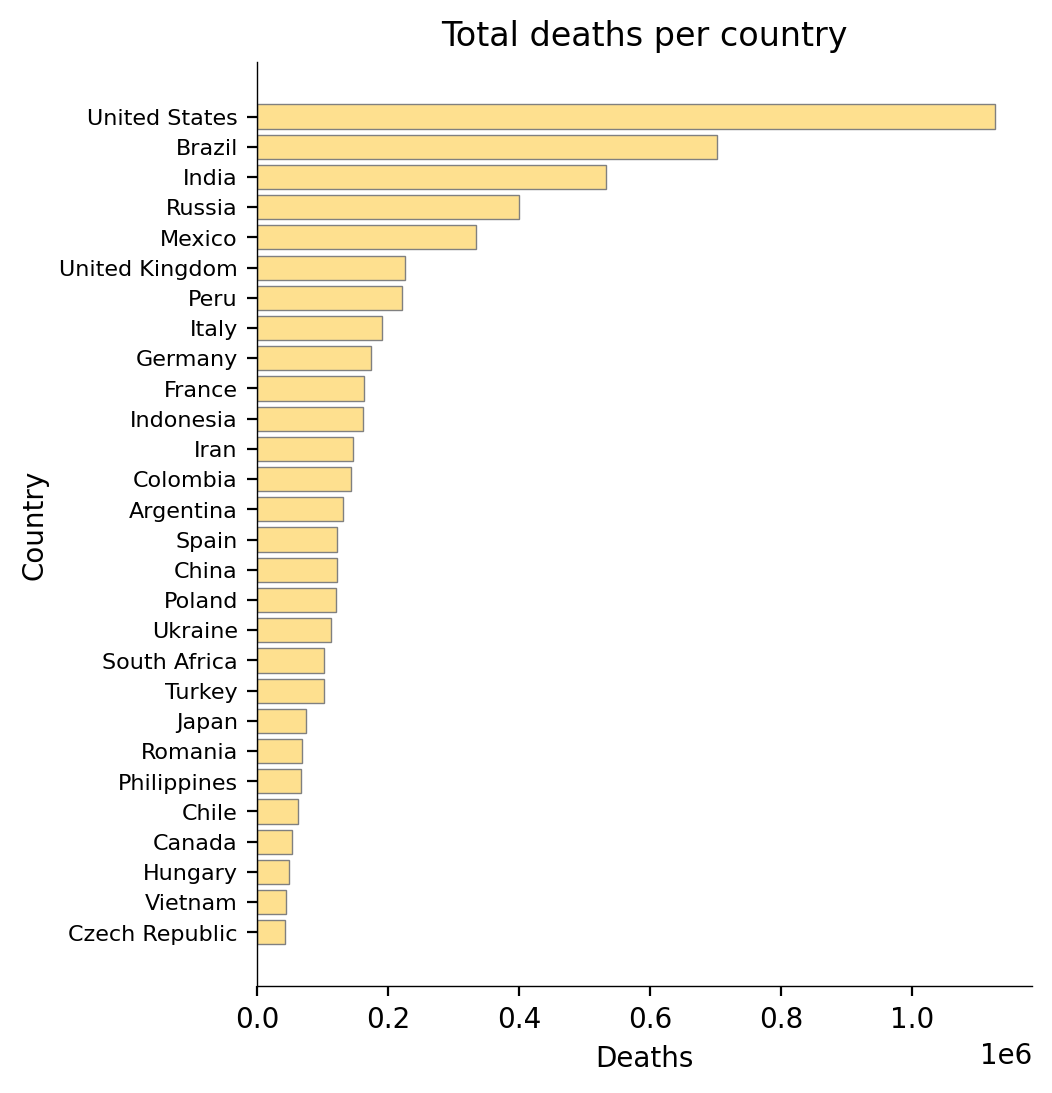

In [146]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(1, 1, figsize=(5,6))
y_pos = np.arange(len(countries))
barcontainers = ax.barh(y_pos, deaths, color='#FEE08F')
ax.invert_yaxis() 
ax.set_yticks(y_pos)
ax.set_yticklabels(countries, fontsize=8, horizontalalignment="right")

for rect in barcontainers.patches:
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

ax.set_title("Total deaths per country")
ax.set_xlabel("Deaths")
ax.set_ylabel("Country")

plt.show()